In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches
import pickle as pkl

In [143]:
def visualize(label_boxes_3d):
    label_boxes_2d = []
    for box in label_boxes_3d:
        x, y, z, w, l, h, vel_x, vel_y, yaw = box
        label_boxes_2d.append((x, y, w, l, yaw))
    # Create a plot
    fig, ax = plt.subplots()
    
    # Plot each label bounding box
    for bbox in label_boxes_2d:
        center_x, center_y, width, length, yaw = bbox
        lower_left_x = center_x - width / 2
        lower_left_y = center_y - length / 2
        rect = patches.Rectangle((lower_left_x, lower_left_y), length, width, angle=yaw, linewidth=1, edgecolor='g', facecolor='none')
        ax.add_patch(rect)
    

    # Plot the ego vehicle at the origin
    ax.plot(0, 0, 'bo')  # blue dot

    # Set plot limits
    ax.set_xlim(-50, 50)
    ax.set_ylim(-50, 50)

    # Set labels and title
    ax.set_xlabel('X position')
    ax.set_ylabel('Y position')
    ax.set_title('2D Bounding Boxes Relative to Ego Vehicle')

    # Save the plot as an image
    plt.savefig('bounding_boxes_plot.png')
    plt.show()


In [6]:
# load label
with open('nuscenes_labels/scene-0001.pkl', 'rb') as f:
    label = pkl.load(f)


In [139]:
# label[0].keys()
boxes = label[0]['gt_boxes']
vels = label[0]['gt_boxes_velocity']
names = label[0]['gt_names']
token = label[0]['token']
names

['traffic_cone',
 'traffic_cone',
 'truck',
 'car',
 'pedestrian',
 'car',
 'truck',
 'pedestrian',
 'traffic_cone',
 'truck']

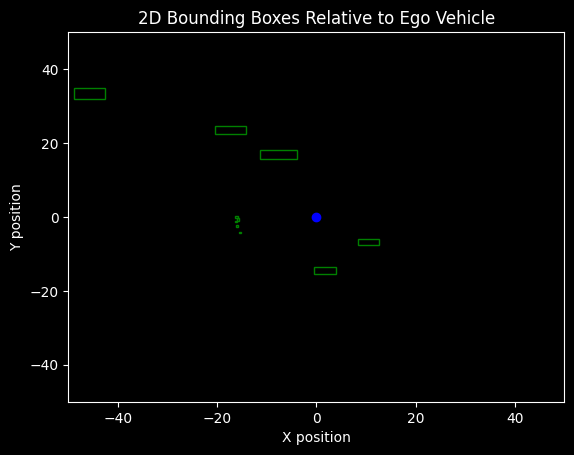

In [26]:
visualize(boxes)

In [28]:
from nuscenes import NuScenes
nusc = NuScenes(version='v1.0-trainval', dataroot='./nuscenes', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 30.111 seconds.
Reverse indexing ...
Done reverse indexing in 6.1 seconds.


In [145]:
imgs = []

cams = ['CAM_FRONT_LEFT', 'CAM_FRONT', 'CAM_FRONT_RIGHT', 'CAM_BACK_LEFT', 'CAM_BACK', 'CAM_BACK_RIGHT']

for cam in cams:
    imgs.append(nusc.get('sample_data', nusc.get('sample', token)['data'][cam])['filename'])

imgs = [plt.imread('nuscenes/' + img) for img in imgs]

# imgs

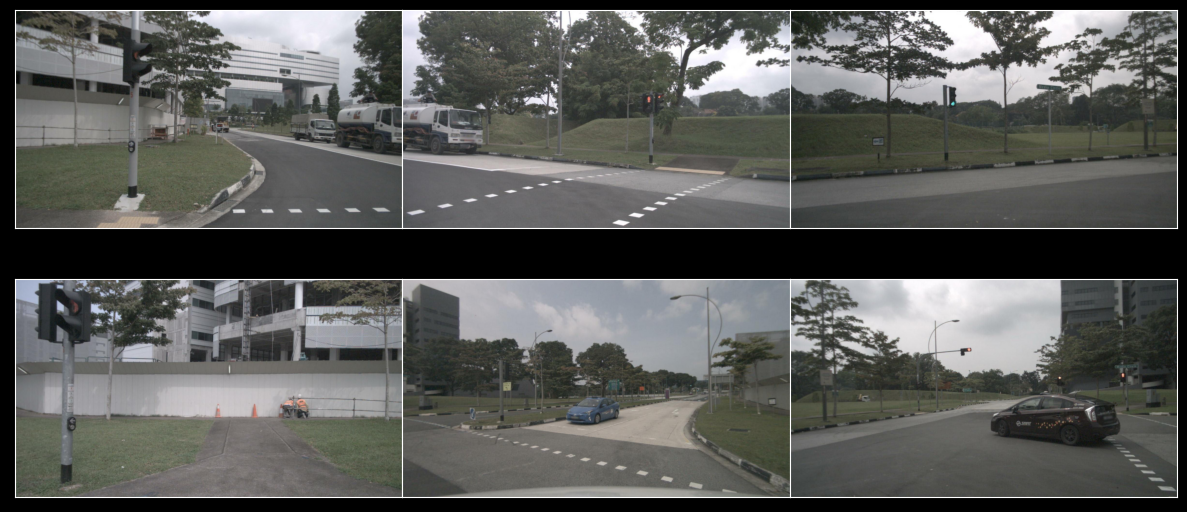

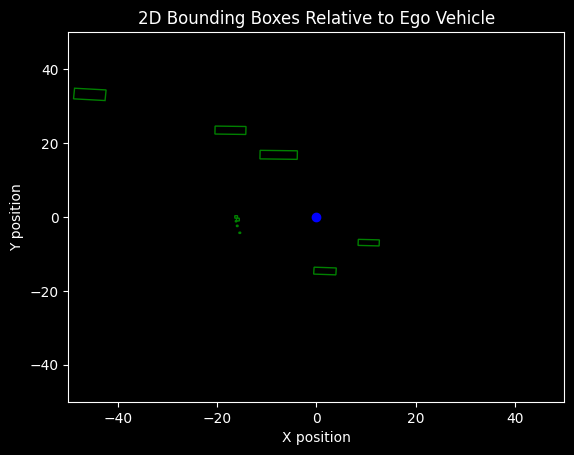

In [146]:
# display images in grid view, and the visualize(labels) below
fig, ax = plt.subplots(2, 3, figsize=(15, 7))
plt.subplots_adjust(wspace=0, hspace=0)
# fig.axes.get_xaxis().set_visible(False)
for i in range(2):
    for j in range(3):
        fig = ax[i, j].imshow(imgs[i*3+j])
        fig.axes.get_xaxis().set_visible(False)
        fig.axes.get_yaxis().set_visible(False)
        # fig.tight_layout()

# show labels
visualize(boxes)